In [2]:
# import dependencies

import pandas as pd
import datetime
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pathlib import Path
import geopandas as gpd

In [3]:
tx_1 = pd.read_csv('/Users/geoffmaitland/Documents/aibootcamp/Git- Local-Repositories/Project-2/daily-temps-2000-2020/archive notebooks/tx-cleaned-final.csv')
clusters_df = pd.read_csv('/Users/geoffmaitland/Documents/aibootcamp/Git- Local-Repositories/Project-2/daily-temps-2000-2020/tx-clustered-fips.csv')

In [4]:
tx_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947926 entries, 0 to 1947925
Data columns (total 24 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   Date                    object 
 2   FIPS Code-County        int64  
 3   Min Ambient Temp        float64
 4   Max Ambient Temp        float64
 5   Mean Ambient Temp       float64
 6   Min Dew Point           float64
 7   Max Dew point           float64
 8   Mean Dew Point          float64
 9   Min Heat Index          float64
 10  Max Heat Index          float64
 11  Mean Heat Index         float64
 12  Min WBGT                float64
 13  Max WBGT                float64
 14  Mean WBGT               float64
 15  Min Relative_Humidity   float64
 16  Max Relative_Humidity   float64
 17  Mean Relative_Humidity  float64
 18  DTR                     float64
 19  Low Threat              int64  
 20  Elevated Threat         int64  
 21  Moderate Threat         int64  

In [5]:
clusters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947926 entries, 0 to 1947925
Data columns (total 3 columns):
 #   Column            Dtype
---  ------            -----
 0   Unnamed: 0        int64
 1   FIPS Code-County  int64
 2   Cluster           int64
dtypes: int64(3)
memory usage: 44.6 MB


In [6]:
tx_2 = tx_1.drop(columns=['Unnamed: 0','Low Threat','Elevated Threat','Moderate Threat','High Threat','Extreme Threat'])

In [7]:
# Convert "Date" to datetime format
tx_2['Date'] = pd.to_datetime(tx_1['Date'].astype(str), format='mixed')
tx_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947926 entries, 0 to 1947925
Data columns (total 18 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Date                    datetime64[ns]
 1   FIPS Code-County        int64         
 2   Min Ambient Temp        float64       
 3   Max Ambient Temp        float64       
 4   Mean Ambient Temp       float64       
 5   Min Dew Point           float64       
 6   Max Dew point           float64       
 7   Mean Dew Point          float64       
 8   Min Heat Index          float64       
 9   Max Heat Index          float64       
 10  Mean Heat Index         float64       
 11  Min WBGT                float64       
 12  Max WBGT                float64       
 13  Mean WBGT               float64       
 14  Min Relative_Humidity   float64       
 15  Max Relative_Humidity   float64       
 16  Mean Relative_Humidity  float64       
 17  DTR                     float64       
dtypes:

In [8]:
# Step 1: Select relevant columns for clustering (ignoring FIPS Code itself initially)
weather_features = tx_2[['Min Ambient Temp', 'Max Ambient Temp', 'Mean Ambient Temp', 
                       'Min Dew Point', 'Max Dew point', 'Mean Dew Point',
                       'Min Heat Index', 'Max Heat Index', 'Mean Heat Index','Min WBGT','Max WBGT','Mean WBGT',
                       'Min Relative_Humidity', 'Max Relative_Humidity', 'Mean Relative_Humidity',
                       'DTR']]


In [9]:
 #Step 2: Standardize the features  
scaler = StandardScaler()
weather_features_scaled = scaler.fit_transform(weather_features)


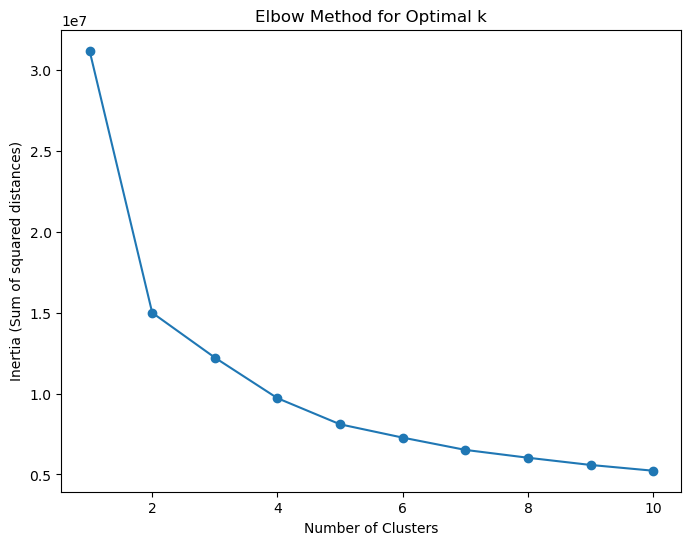

In [10]:

# Create a list to store inertia values for different numbers of clusters
inertia = []

# Loop over a range of cluster numbers
for n in range(1, 11):  # Try from 1 to 10 clusters
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(weather_features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia values
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of squared distances)')
plt.show()

In [11]:
# Step 3: Apply k-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # You can adjust the number of clusters as needed
tx_2['Cluster'] = kmeans.fit_predict(weather_features_scaled)

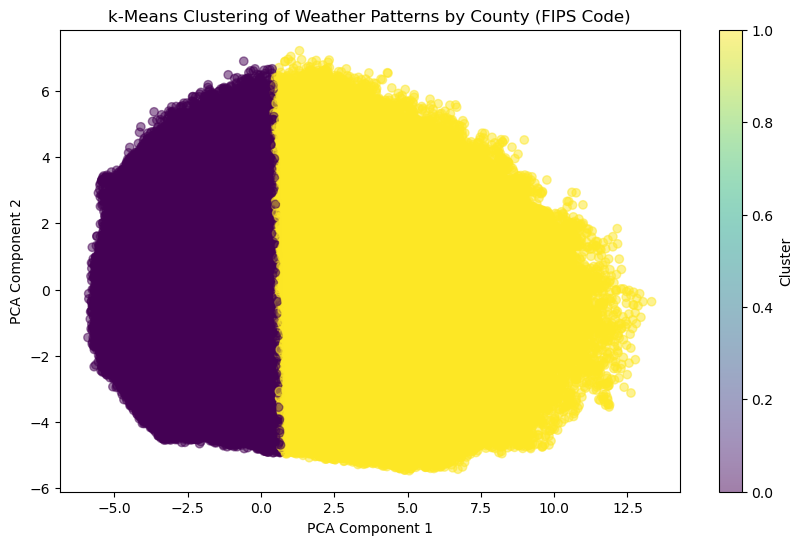

In [12]:
# Step 4: Visualize clusters (optional, using two principal components for simplicity)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(weather_features_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=tx_2['Cluster'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.title('k-Means Clustering of Weather Patterns by County (FIPS Code)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [13]:
# Step 5: Analyze results
# Combine FIPS codes with clusters
clustered_fips_df = tx_2[['FIPS Code-County', 'Cluster']]

In [14]:
# Print cluster assignments
clustered_fips_df

,FIPS Code-County,Cluster
0,48001,0
1,48003,1
2,48005,0
3,48007,0
4,48009,1
...,...,...
1947921,48499,1
1947922,48501,1
1947923,48503,1
1947924,48505,0


In [15]:
# Get the cluster centers from the k-Means model (in the scaled space)
cluster_centers = kmeans.cluster_centers_

# Reverse the scaling to interpret the centers in the original feature space
original_centers = scaler.inverse_transform(cluster_centers)

# Convert to a DataFrame for better readability
centroids_df = pd.DataFrame(original_centers, columns=weather_features.columns)

# Print the centroids for each cluster
print(centroids_df)

   Min Ambient Temp  Max Ambient Temp  Mean Ambient Temp  Min Dew Point  \
0         68.831403         86.703508          77.188549      57.329345   
1         41.992575         62.312675          51.509952      27.299714   

   Max Dew point  Mean Dew Point  Min Heat Index  Max Heat Index  \
0      66.359993       62.202308       69.452527       87.933169   
1      41.090274       33.901816       40.448726       60.307529   

   Mean Heat Index   Min WBGT   Max WBGT  Mean WBGT  Min Relative_Humidity  \
0        78.275420  65.316346  80.613200  72.141147               0.696372   
1        49.703925  37.688515  58.449838  47.132989               0.598812   

   Max Relative_Humidity  Mean Relative_Humidity        DTR  
0               0.534576                0.625276  17.872106  
1               0.503389                0.545124  20.320100  


In [16]:
from sklearn.metrics import davies_bouldin_score

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(weather_features_scaled, clustered_fips_df['Cluster'])
print(f'Davies-Bouldin Index: {db_score:.4f}')


Davies-Bouldin Index: 0.8941


In [18]:
from sklearn.metrics import silhouette_score


data = np.random.rand(100, 2)  # 100 samples, 2 features

# KMeans Clustering
kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(data)  # cluster_labels is 1D

# Silhouette score evaluation (data is 2D, cluster_labels is 1D)
silhouette_avg = silhouette_score(data, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.392


In [38]:
tx_merge = pd.concat([clustered_fips_df,weather_features],axis=1)
tx_merge

,FIPS Code-County,Cluster,Min Ambient Temp,Max Ambient Temp,Mean Ambient Temp,Min Dew Point,Max Dew point,Mean Dew Point,Min Heat Index,Max Heat Index,Mean Heat Index,Min WBGT,Max WBGT,Mean WBGT,Min Relative_Humidity,Max Relative_Humidity,Mean Relative_Humidity,DTR
0,48001,0,64.345999,71.636001,67.045999,61.951999,65.677998,63.589999,64.813999,72.157999,67.622002,62.924001,71.563999,65.839999,0.919381,0.815166,0.886719,7.290002
1,48003,1,38.714000,63.950000,52.484000,18.446000,32.198000,22.964000,36.284000,61.016002,49.280001,32.234000,55.202001,44.384000,0.436078,0.303727,0.313463,25.236000
2,48005,0,64.148001,74.030001,67.766002,61.969999,65.750000,63.860001,64.616002,74.444000,68.377998,62.762000,72.157999,66.362000,0.926353,0.753860,0.873194,9.882000
3,48007,0,68.360001,75.325999,70.538000,64.795999,66.182000,65.533998,69.080001,75.901999,71.257999,66.506000,74.119999,69.062000,0.883977,0.732783,0.841904,6.965998
4,48009,1,51.512000,69.512000,60.547999,23.738000,51.782000,38.588000,49.675999,67.082000,58.604000,47.282000,62.132000,54.500000,0.335609,0.532892,0.441220,18.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947921,48499,1,42.782000,62.222002,53.780001,42.206000,62.132000,52.502001,41.378000,62.833998,53.347999,41.900000,63.319999,52.952001,0.978112,0.996832,0.954230,19.440002
1947922,48501,1,32.270000,47.462000,38.498000,7.412000,34.466000,18.482000,32.270000,44.258000,36.914000,26.330000,40.622000,33.728000,0.346292,0.604788,0.440456,15.192000
1947923,48503,1,39.470000,62.725999,44.852000,22.838000,58.928000,38.750000,36.824000,62.798001,43.520000,34.394000,60.602001,42.620000,0.510217,0.873993,0.790417,23.255999
1947924,48505,0,63.122002,82.166002,71.762000,52.412000,61.142001,57.236001,62.707999,81.283998,71.545999,59.378000,76.568000,66.992001,0.680537,0.490453,0.602174,19.044000


In [39]:
# export csv 
tx_merge.to_csv('tx-merge-map.csv')

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load your temperature dataset (with FIPS codes)
tx_map = pd.read_csv('/Users/geoffmaitland/Documents/aibootcamp/Git-Local-Repositories/Project-2/daily-temps-2000-2020/archive notebooks/tx-merge-map.csv')

# Load the US counties shapefile from Geopandas datasets or use a custom shapefile
url = "https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_5m.zip"
counties_gdf = gpd.read_file(url)

# Convert both FIPS Code columns to strings for consistency
tx_map['FIPS Code-County'] = tx_map['FIPS Code-County'].astype(str)
counties_gdf['GEOID'] = counties_gdf['GEOID'].astype(str)

# Merge your temperature data with the counties shapefile on the FIPS code
merged_gdf = counties_gdf.merge(tx_map, left_on='GEOID', right_on='FIPS Code-County')

# Create a plot figure
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the merged GeoDataFrame and remove the axis ticks and labels
merged_gdf.plot(column='Cluster', cmap='rainbow', legend=True, ax=ax)

# Remove the axis numbers (ticks and labels)
ax.set_xticks([])  # Remove x-axis numbers
ax.set_yticks([])  # Remove y-axis numbers
ax.set_xticklabels([])  # Remove x-axis labels
ax.set_yticklabels([])  # Remove y-axis labels

# Set the title
plt.title('Climasense Texas County Breakdown')

# Show the plot
plt.show()

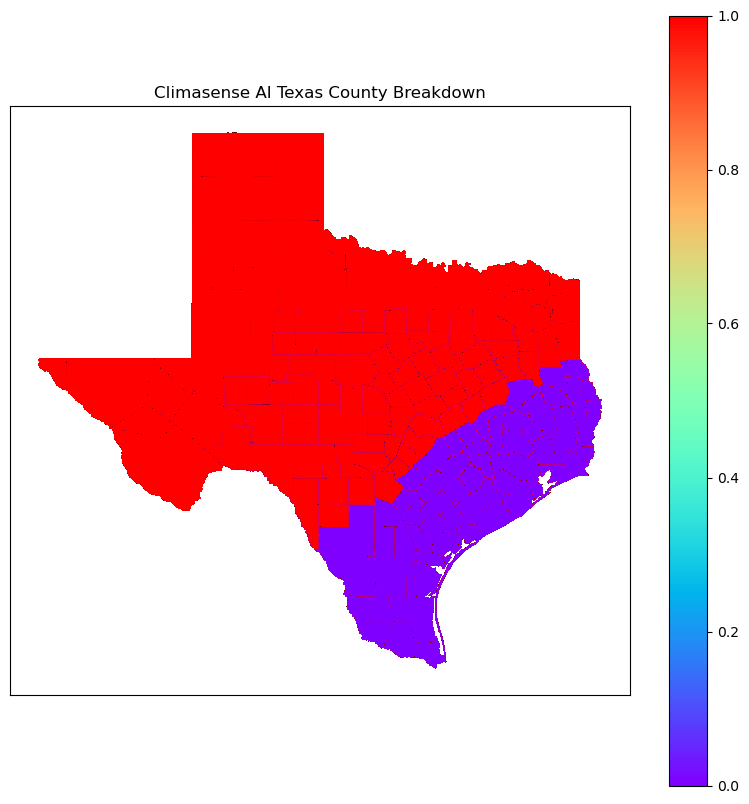

In [56]:


# Load your temperature dataset (with FIPS codes)
# Example of loading a CSV file (replace this with your actual dataset)
tx_map = pd.read_csv('/Users/geoffmaitland/Documents/aibootcamp/Git- Local-Repositories/Project-2/daily-temps-2000-2020/archive notebooks/tx-merge-map.csv')

# Load the US counties shapefile from Geopandas datasets or use a custom shapefile
# The Geopandas dataset for US counties includes FIPS codes
url = "https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_5m.zip"
counties_gdf = gpd.read_file(url)

# Convert both FIPS Code columns to strings for consistency
tx_map['FIPS Code-County'] = tx_map['FIPS Code-County'].astype(str)
counties_gdf['GEOID'] = counties_gdf['GEOID'].astype(str)


# Merge your temperature data with the counties shapefile on the FIPS code
merged_gdf = counties_gdf.merge(tx_map, left_on='GEOID', right_on='FIPS Code-County')


# Plot the merged GeoDataFrame and remove the axis ticks and labels
ax = merged_gdf.plot(column='Cluster', cmap='rainbow', legend=True, figsize=(10, 10))

# Remove the axis labels and tick marks
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.set_xticklabels([])  # Remove x-axis labels
ax.set_yticklabels([])  # Remove y-axis labels



# Set the title
plt.title('Climasense AI Texas County Breakdown')

# Show the plot
plt.show()

In [ ]:


# Load your temperature dataset (with FIPS codes)
# Example of loading a CSV file (replace this with your actual dataset)
tx_map = pd.read_csv('/Users/geoffmaitland/Documents/aibootcamp/Git- Local-Repositories/Project-2/daily-temps-2000-2020/archive notebooks/tx-merge-map.csv')

# Load the US counties shapefile from Geopandas datasets or use a custom shapefile
# The Geopandas dataset for US counties includes FIPS codes
url = "https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_5m.zip"
counties_gdf = gpd.read_file(url)

# Convert both FIPS Code columns to strings for consistency
tx_map['FIPS Code-County'] = tx_map['FIPS Code-County'].astype(str)
counties_gdf['GEOID'] = counties_gdf['GEOID'].astype(str)


# Merge your temperature data with the counties shapefile on the FIPS code
merged_gdf = counties_gdf.merge(tx_map, left_on='GEOID', right_on='FIPS Code-County')

# Plot the merged GeoDataFrame and remove the axis ticks and labels
merged_gdf.plot(column='Cluster', cmap='rainbow', legend=True,ax=ax)

 # Remove the axis labels and tick marks
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.set_xticklabels([])  # Remove x-axis labels
ax.set_yticklabels([])  # Remove y-axis label
# Set the title
plt.title('Climasense AI Texas County Breakdown')

# Show the plot
plt.show()

In [ ]:
# Plot the merged GeoDataFrame and remove the axis ticks and labels
ax = merged_gdf.plot(column='Cluster', cmap='rainbow', legend=True, figsize=(10, 10))

# Remove the axis labels and tick marks
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.set_xticklabels([])  # Remove x-axis labels
ax.set_yticklabels([])  # Remove y-axis labels

# Set the title
plt.title('Climasense AI Texas County Breakdown')

# Show the plot
plt.show()